<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
#Меня зовут : Багаутдинов Искандар . kaggle nickname : Iskandar Bagautdinov;  

from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# В этой части кода мы проверяем данные на наличие пропусков
#print(data.isnull().sum(axis=0), end= "\n")
#print((data[:].isna()).sum()) # в это строке мы выводим количество nan-ов в каждом столбце , по выводу можем наблюдать , что nan-ы отстутвуют в таблице

data=data.replace(' ', np.nan) #  в этой строке заменяем любые пропуски nan-ом
#print((data.isna()).sum())  # посчитаем в каких колонках теперь появились nan и  в каком количестве
data=data.dropna() # выбросим все строки с пропусками
#print(data.head())

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5273 non-null   float64
 1   MonthlySpending  5273 non-null   float64
 2   TotalSpent       5273 non-null   float64
dtypes: float64(3)
memory usage: 164.8 KB
Male      2651
Female    2622
Name: Sex, dtype: int64
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64
No     2704
Yes    2569
Name: HasPartner, dtype: int64
No     3676
Yes    1597
Name: HasChild, dtype: int64
Yes    4754
No      519
Name: HasPhoneService, dtype: int64
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int

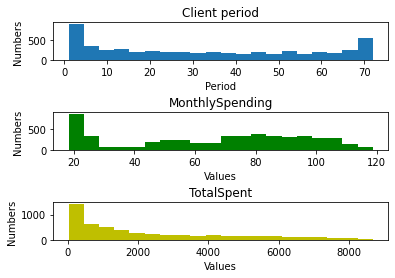

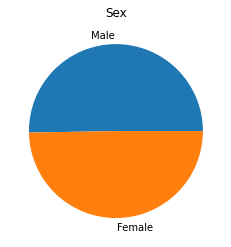

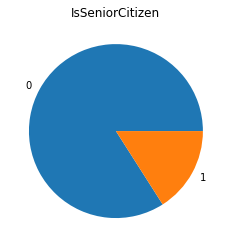

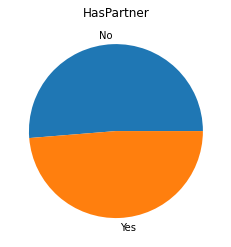

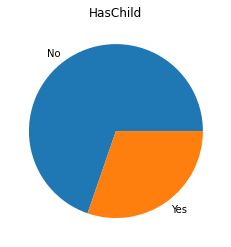

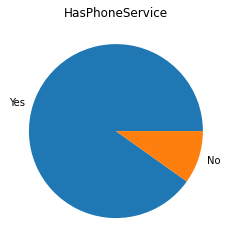

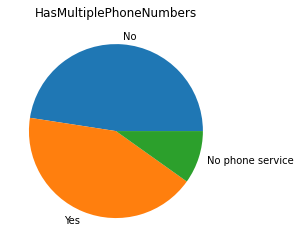

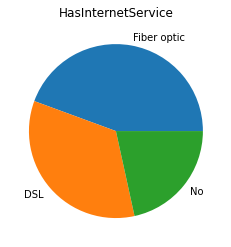

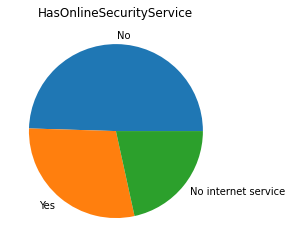

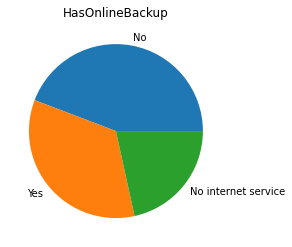

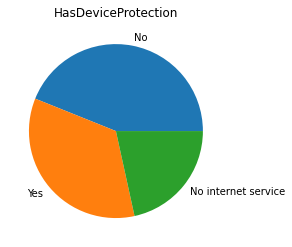

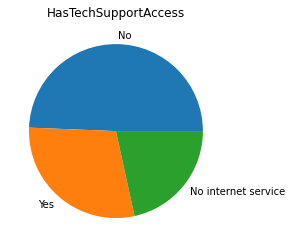

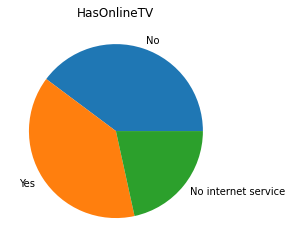

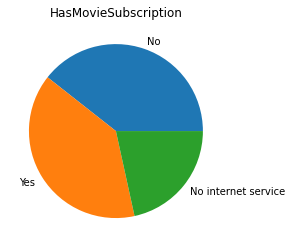

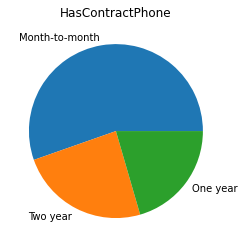

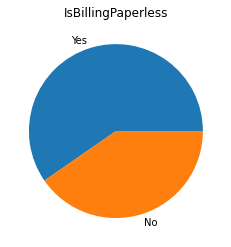

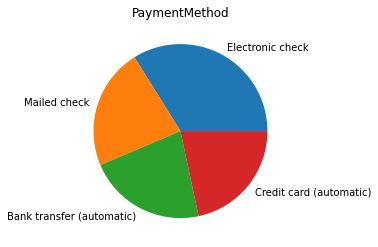

In [ ]:
#
# Тут начинаем строить аналитику графически
New_data= data[num_cols]
New_data=New_data.astype('float')
New_data.info()

plt.figure(1)
plt.subplot(511)
plt.hist(New_data['ClientPeriod'],bins=20)
plt.ylabel('Numbers')
plt.title('Client period')
plt.xlabel ('Period')


plt.subplot(513)
plt.hist(New_data['MonthlySpending'],bins=20,color='g')
plt.ylabel('Numbers')
plt.title('MonthlySpending')
plt.xlabel ('Values')

plt.subplot(515)
plt.hist(New_data['TotalSpent'],bins=20,color='y')
plt.ylabel('Numbers')
plt.title('TotalSpent')
plt.xlabel ('Values')



# Проведем аналитику категориальных признаков
plt.figure(2)
count=1
Categorical=data[cat_cols]
# Выводедены все категориальные признаки , по отдельности посчитаны количества для каждого значения
for i in cat_cols :
    Val_count=Categorical[i].value_counts()
    labels=Val_count.index.values

    count+=1
    plt.figure(count)
    print(Categorical[i].value_counts())
    plt.pie(Categorical[i].value_counts(),labels=labels)
    plt.title(i)


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

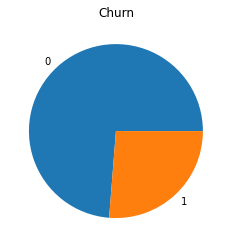

In [ ]:
# Отдельно рассмотрим таргетный признак
labels=data[target_col].value_counts().index.values
count+=1
plt.figure(count)
plt.pie(data[target_col].value_counts(),labels = labels)
plt.title(target_col)
plt.show()
# После отрисовки графика видно , что несбалансированности классов не наблюдается
# Вопрос : как искать выбросы ?

# Ниже проводится one - hot кодирование  и нормирование численных признаков

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# Ниже проводится one - hot кодирование  и нормирование численных признаков



dummy_features=pd.get_dummies(data[cat_cols])
New_Data_dummies=pd.concat([New_data,dummy_features],axis=1)
y=data['Churn']
New_Data_dummies.info()


# Проводим разделение ваборки на train  и test
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test=train_test_split(New_Data_dummies, y, train_size=0.8 , random_state=42 )



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
#создаем pipeline для нормировки признаков без утечек
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid, cv=5 , scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print("Коэффициенты логистической регрессии:\n{}".format(
 grid.best_estimator_.named_steps["logisticregression"].coef_))

print("Правильность на тестовом наборе: {:.2f}".format(
 grid.score(X_test, y_test)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5273 non-null   float64
 1   MonthlySpending                               5273 non-null   float64
 2   TotalSpent                                    5273 non-null   float64
 3   IsSeniorCitizen                               5273 non-null   int64  
 4   Sex_Female                                    5273 non-null   uint8  
 5   Sex_Male                                      5273 non-null   uint8  
 6   HasPartner_No                                 5273 non-null   uint8  
 7   HasPartner_Yes                                5273 non-null   uint8  
 8   HasChild_No                                   5273 non-null   uint8  
 9   HasChild_Yes                                  5273 non-null   u

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost
import catboost
data_New=pd.concat([New_data,data[cat_cols]],axis=1)
data_train_origin , data_test_origin, _,_ = train_test_split(data_New, y,train_size=0.8 ,random_state=42)


boosting_model = catboost.CatBoostClassifier(
                             cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false', metric_period=20)
grid = {
        'depth': [4, 6, 10],
        'iterations': [500,1000,1500],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

boosting_model.grid_search(grid,
                           data_train_origin,
                           y_train, refit=True)

     |████████████████████████████████| 66.2MB 62kB/s 

bestTest = 0.8679183612
bestIteration = 280

0:	loss: 0.8679184	best: 0.8679184 (0)	total: 3.79s	remaining: 2m 46s

bestTest = 0.8674091507
bestIteration = 160

1:	loss: 0.8674092	best: 0.8679184 (0)	total: 7.3s	remaining: 2m 37s

bestTest = 0.8682589817
bestIteration = 260

2:	loss: 0.8682590	best: 0.8682590 (2)	total: 10.9s	remaining: 2m 32s

bestTest = 0.8677669743
bestIteration = 380

3:	loss: 0.8677670	best: 0.8682590 (2)	total: 14.4s	remaining: 2m 27s

bestTest = 0.8681695258
bestIteration = 420

4:	loss: 0.8681695	best: 0.8682590 (2)	total: 17.8s	remaining: 2m 22s

bestTest = 0.8679183612
bestIteration = 280

5:	loss: 0.8679184	best: 0.8682590 (2)	total: 25.2s	remaining: 2m 43s

bestTest = 0.8674091507
bestIteration = 160

6:	loss: 0.8674092	best: 0.8682590 (2)	total: 32.5s	remaining: 2m 56s

bestTest = 0.8683622001
bestIteration = 840

7:	loss: 0.8683622	best: 0.8683622 (7)	total: 39.6s	remaining: 3m 3s

bestTest = 0.86776

{'cv_results': defaultdict(list,
             {'iterations': [0,
               20,
               40,
               60,
               80,
               100,
               120,
               140,
               160,
               180,
               200,
               220,
               240,
               260,
               280,
               300,
               320,
               340,
               360,
               380,
               400,
               420,
               440,
               460,
               480,
               500,
               520,
               540,
               560,
               580,
               600,
               620,
               640,
               660,
               680,
               700,
               720,
               740,
               760,
               780,
               800,
               820,
               840,
               860,
               880,
               900,
               920,
               940,

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
# подставляю в best_model значения наилучших параметром , полученных из grid search
best_model = catboost.CatBoostClassifier(        depth=4 ,l2_leaf_reg=5 , iterations=1000 ,
                           cat_features = cat_cols , eval_metric='AUC:hints=skip_train~false',  random_state=42)
data_train_origin , data_test_origin, _,_ = train_test_split(data_New, y,train_size=0.8 ,random_state=42)
best_model.fit(data_train_origin , y_train)
y_pred=best_model.predict_proba(data_test_origin)
roc_auc2=roc_auc_score(y_test,y_pred[:,1])

print(roc_auc2)

0:	learn: 0.7813344	total: 13.6ms	remaining: 13.6s
1:	learn: 0.8204590	total: 25.3ms	remaining: 12.6s
2:	learn: 0.8228537	total: 35.6ms	remaining: 11.8s
3:	learn: 0.8293476	total: 46.1ms	remaining: 11.5s
4:	learn: 0.8300292	total: 55.9ms	remaining: 11.1s
5:	learn: 0.8306446	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8313305	total: 73.3ms	remaining: 10.4s
7:	learn: 0.8312073	total: 77.3ms	remaining: 9.58s
8:	learn: 0.8320772	total: 85.9ms	remaining: 9.46s
9:	learn: 0.8331884	total: 95.8ms	remaining: 9.48s
10:	learn: 0.8328907	total: 106ms	remaining: 9.54s
11:	learn: 0.8328097	total: 116ms	remaining: 9.53s
12:	learn: 0.8346429	total: 126ms	remaining: 9.55s
13:	learn: 0.8371582	total: 135ms	remaining: 9.52s
14:	learn: 0.8384464	total: 145ms	remaining: 9.51s
15:	learn: 0.8386027	total: 153ms	remaining: 9.44s
16:	learn: 0.8390446	total: 163ms	remaining: 9.43s
17:	learn: 0.8384794	total: 173ms	remaining: 9.44s
18:	learn: 0.8390731	total: 183ms	remaining: 9.46s
19:	learn: 0.8393273	total: 193

In [49]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./m_submission.csv')
my=pd.read_csv('./m_submission.csv',index_col='Id')
my.to_csv('./1_submission.csv')
submission = my
submission.drop(['Unnamed: 0'], axis='columns', inplace=True)


submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.